# Brain Tumor Identification
By Jonathan Nunez

abstract

# Business Understanding

# Data Understanding

## Data preparation

In [ ]:
# For Google Colab only
# Cell output cleared as it only contains installation progress information
!pip install keras
!pip install keras_preprocessing
!pip install tensorflow
!pip install scikeras[tensorflow]
!pip install split-folders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


In [ ]:
# Importing tools and modules for data preperation
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import splitfolders

In [ ]:
# Code to create kaggle path for data download
# Code taken from stackoverflow user fdsig
import json
import os
from pathlib import Path

# your api key
api_key = {
'username':"",
'key':""}

# uses pathlib Path
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

# opens file and dumps python dict to json object
with open (kaggle_path/'kaggle.json', 'w') as handl:
    json.dump(api_key,handl)

os.chmod(kaggle_path/'kaggle.json', 600)

In [ ]:
# Downloading kaggle dataset
!kaggle datasets download -d ishans24/brain-tumor-dataset

# Making parent folder directory before data unzip
!mkdir /content/brain_tumor_dataset
!unzip brain-tumor-dataset.zip -d /content/brain_tumor_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/brain_tumor_dataset/meningioma/meningioma515.png  
  inflating: /content/brain_tumor_dataset/meningioma/meningioma516.png  
  inflating: /content/brain_tumor_dataset/meningioma/meningioma517.png  
  inflating: /content/brain_tumor_dataset/meningioma/meningioma518.png  
  inflating: /content/brain_tumor_dataset/meningioma/meningioma519.png  
  inflating: /content/brain_tumor_dataset/meningioma/meningioma52.png  
  inflating: /content/brain_tumor_dataset/meningioma/meningioma520.png  
  inflating: /content/brain_tumor_dataset/meningioma/meningioma521.png  
  inflating: /content/brain_tumor_dataset/meningioma/meningioma522.png  
  inflating: /content/brain_tumor_dataset/meningioma/meningioma523.png  
  inflating: /content/brain_tumor_dataset/meningioma/meningioma524.png  
  inflating: /content/brain_tumor_dataset/meningioma/meningioma525.png  
  inflating: /content/brain_tumor_dataset/meningioma/meningioma526.png  
 

In [ ]:
# Splitting data into train, test, val, directories
splitfolders.ratio('brain_tumor_dataset', output='b_tumor_data_split', seed=42, ratio=(.7, 0.15,0.15))

Copying files: 10560 files [00:04, 2122.59 files/s]


In [ ]:
# Creating directory paths
train_dir = 'b_tumor_data_split/train'
test_dir = 'b_tumor_data_split/test'
val_dir = 'b_tumor_data_split/val'

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(256, 256),
                                              batch_size=32,
                                              )

test_generator = datagen.flow_from_directory(test_dir,
                                             target_size=(256, 256),
                                             batch_size=32,
                                             )

val_generator = datagen.flow_from_directory(val_dir,
                                            target_size=(256, 256),
                                            batch_size=32,
                                            seed=42
                                            )

Found 7390 images belonging to 4 classes.
Found 1588 images belonging to 4 classes.
Found 1582 images belonging to 4 classes.


In [13]:
# Creating datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [17]:
train_images[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

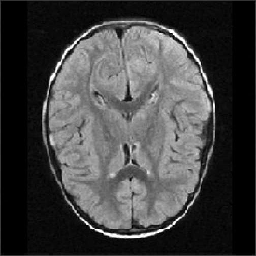

In [20]:
array_to_img(train_images[2])

# Modeling

# Evaluation

# Limitations

# Next Steps